In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
df = pd.read_csv('./dataset/diabetes.csv', skiprows=1, names=['pregnant', 'plasma', 'pressure', 'thickness', 'insulin', 'BMI', 'pedigree', 'age', 'class'])

In [19]:
df.head(5)

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [21]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [22]:
# 데이터 중 임신 정보와 클래스 만을 출력
df[['pregnant', 'class']]

,pregnant,class
0,6,1
1,1,0
2,8,1
3,1,0
4,0,1
...,...,...
763,10,0
764,2,0
765,5,0
766,1,1


In [23]:
# 임신 횟수 당 당뇨병 발병 확률
df[['pregnant', 'class']]\
    .groupby(['pregnant'], as_index=False)\
    .mean().sort_values(by = 'pregnant', ascending=True)

,pregnant,class
0,0,0.342342
1,1,0.214815
2,2,0.184466
3,3,0.360000
4,4,0.338235
5,5,0.368421
6,6,0.320000
7,7,0.555556
8,8,0.578947
9,9,0.642857


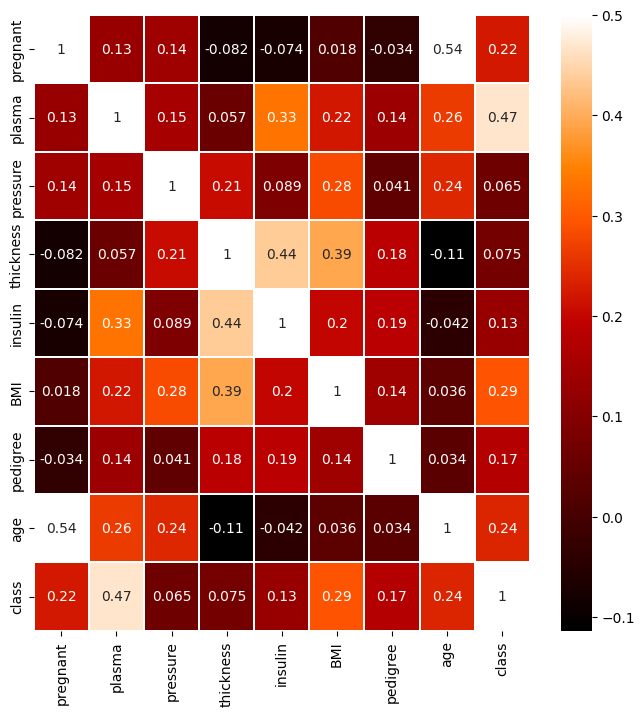

In [25]:
# 데이터 간의 상관관계를 그래프로 표현
colormap = plt.cm.gist_heat # 그래프의 색상 구성 결정
plt.figure(figsize=(8, 8))  # 그래프의 크기 결정

# 그래프의 속성 결정. vmax 의 값을 0.5로 지정해 0.5에 가까울 수록 밝은 색으로 표시되게 한다
sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=colormap, linecolor='white', annot=True)
plt.show()

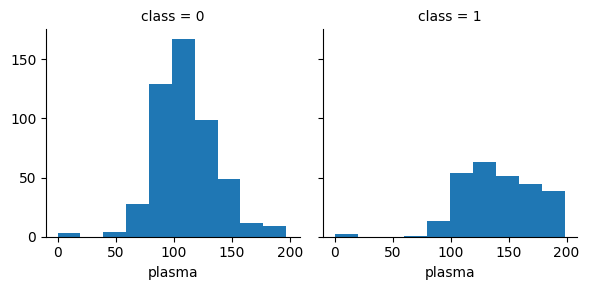

In [26]:
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma', bins=10)
plt.show()

당뇨병 환자의 경우 (class=1) plasma 수치가 150 이상이 많다

In [50]:
# 딥러닝을 구동하는 데 필요한 케라스 함수 불러오기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 필요한 라이브러리 불러오기
import numpy as np
import tensorflow as tf

# 실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분
np.random.seed(3)
tf.random.set_seed(3)

In [51]:
# 데이터 로드
dataset = pd.read_csv('./dataset/diabetes.csv')

X = dataset.drop('Outcome' ,axis=1)
Y = dataset['Outcome']

# 모델 설정
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델을 컴파일
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 실행
history = model.fit(X, Y, epochs=200, batch_size=10)

# 결과 출력
print('\n Accuracy : %.4f'
      % (model.evaluate(X, Y)[1]))

Epoch 1/200
77/77 [==============================] - 0s 1ms/step - loss: 1.9481 - accuracy: 0.5430
Epoch 2/200
77/77 [==============================] - 0s 1ms/step - loss: 1.0795 - accuracy: 0.5872
Epoch 3/200
77/77 [==============================] - 0s 1ms/step - loss: 0.8752 - accuracy: 0.5990
Epoch 4/200
77/77 [==============================] - 0s 1ms/step - loss: 0.7668 - accuracy: 0.6380
Epoch 5/200
77/77 [==============================] - 0s 977us/step - loss: 0.7426 - accuracy: 0.6654
Epoch 6/200
77/77 [==============================] - 0s 971us/step - loss: 0.7221 - accuracy: 0.6471
Epoch 7/200
77/77 [==============================] - 0s 927us/step - loss: 0.6722 - accuracy: 0.6823
Epoch 8/200
77/77 [==============================] - 0s 940us/step - loss: 0.6666 - accuracy: 0.6849
Epoch 9/200
77/77 [==============================] - 0s 950us/step - loss: 0.6802 - accuracy: 0.6732
Epoch 10/200
77/77 [==============================] - 0s 1ms/step - loss: 0.6608 - accuracy: 0.6758

In [52]:
data = history.history
# 첫번째 loss, 두번째 accuracy

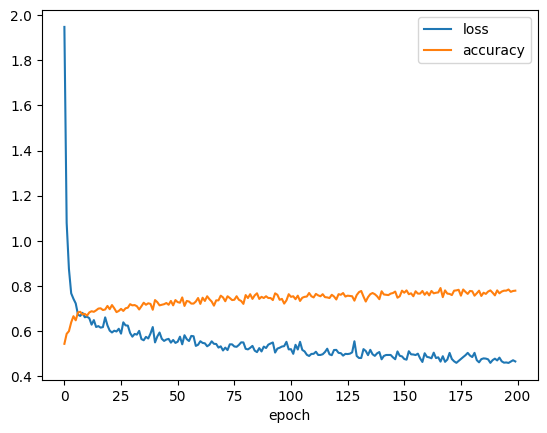

In [53]:
import matplotlib.pyplot as plt

plt.plot(data['loss'], label='loss')
plt.plot(data['accuracy'], label='accuracy')
plt.legend()
plt.xlabel('epoch')
plt.show()